In [1]:
import pandas as pd

tax_structure= pd.read_csv('structure-20230401.csv', sep=';', encoding='utf-8')

In [2]:
# ищем сгруппированные отрасли
search_word = 'всего'
filtered_industry = tax_structure[tax_structure['description'].str.contains(search_word)]

print(filtered_industry[['Id', 'description']])
interesting_indexes = filtered_industry['Id'].reset_index(drop=True)

       Id                                        description
2      G1  Код по ОКВЭД А 01-03  Сельское, лесное хозяйст...
6      G5  Код по ОКВЭД А 05-09 Добыча полезных ископаемы...
20    G19  Код по ОКВЭД  С 10-33 Обрабатывающие производс...
61    G60  Код по ОКВЭД D 35 Обеспечение электрической эн...
65    G64  Код по ОКВЭД E 36-39 Водоснабжение, водоотведе...
70    G69  Код по ОКВЭД G 45-47 Торговля оптовая и рознич...
73    G72  Код по ОКВЭД H 49-53 Транспортировка и хранени...
82    G81  Код по ОКВЭД I 55-56 Деятельность гостиниц и п...
84    G83  Код по ОКВЭД J 58-63 Деятельность в области ин...
87    G86   Код по ОКВЭД K 64-66 Деятельность финансовая ...
101  G100  Код по ОКВЭД R 90-93 Деятельность в области ку...


In [3]:
tax_value_2021 = pd.read_csv('data-20210804-structure-20210303.csv', sep=';', encoding='utf-8')
tax_value_2022 = pd.read_csv('data-20221201-structure-20221201.csv', sep=';', encoding='utf-8')
tax_value_2022 = tax_value_2022.drop(index=85)
tax_value_2023 = pd.read_csv('data-20230401-structure-20230401.csv', sep=';', encoding='utf-8')

# значения читаются строкой, конвертация встроенными методами провалилась 
# как следствие - провалилось и человеческое суммирование
def get_tax_value(df_tax_value):
    interesting_tax_value = df_tax_value[interesting_indexes].replace('х','0')
    sum_tax = []
    for index in interesting_indexes:
        tax = 0
        for value in interesting_tax_value[f'{index}']:
            tax += int(value.replace(' ',''))
        sum_tax.append(tax)
    return sum_tax

sum_tax_2021 = get_tax_value(tax_value_2021)
sum_tax_2022 = get_tax_value(tax_value_2022)
sum_tax_2023 = get_tax_value(tax_value_2023)

In [4]:
print(sum_tax_2023.index(max(sum_tax_2023)))
print(sum_tax_2022.index(max(sum_tax_2022)))
print(sum_tax_2021.index(max(sum_tax_2021)))


1
1
1


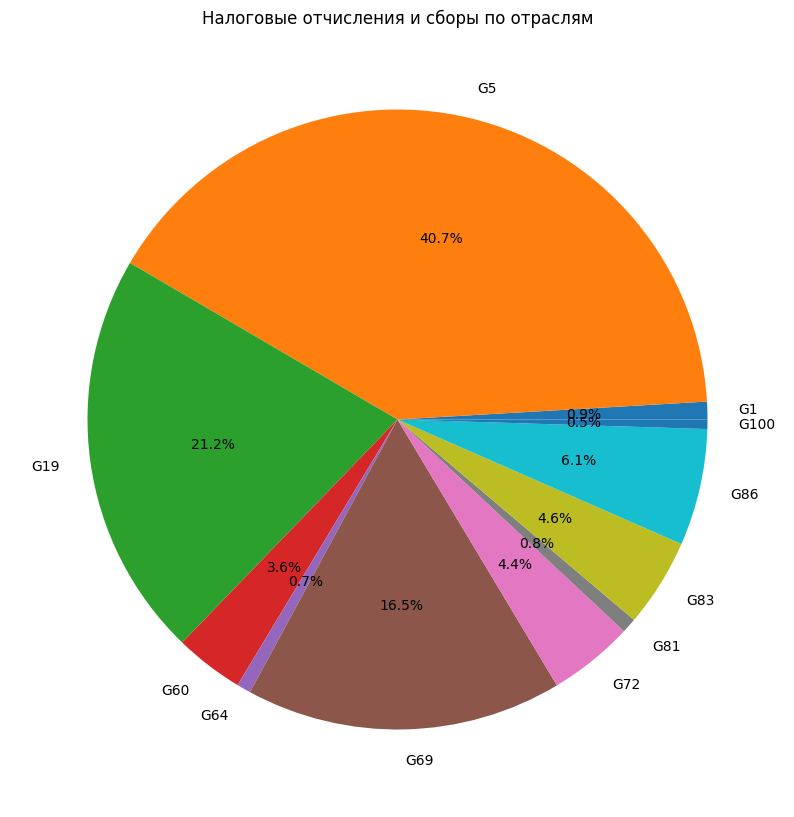

,Id,description
2,G1,"Код по ОКВЭД А 01-03 Сельское, лесное хозяйст..."
6,G5,Код по ОКВЭД А 05-09 Добыча полезных ископаемы...
20,G19,Код по ОКВЭД С 10-33 Обрабатывающие производс...
61,G60,Код по ОКВЭД D 35 Обеспечение электрической эн...
65,G64,"Код по ОКВЭД E 36-39 Водоснабжение, водоотведе..."
70,G69,Код по ОКВЭД G 45-47 Торговля оптовая и рознич...
73,G72,Код по ОКВЭД H 49-53 Транспортировка и хранени...
82,G81,Код по ОКВЭД I 55-56 Деятельность гостиниц и п...
84,G83,Код по ОКВЭД J 58-63 Деятельность в области ин...
87,G86,Код по ОКВЭД K 64-66 Деятельность финансовая ...


In [15]:
import matplotlib.pyplot as plt

labels = interesting_indexes
sizes = list(map(sum, zip(sum_tax_2021,sum_tax_2022,sum_tax_2023)))


fig, ax = plt.subplots(figsize=(10, 15))

ax.pie(sizes, labels=labels, autopct='%1.1f%%')


ax.set(title='Налоговые отчисления и сборы по отраслям', 
    ylabel='')

plt.show()


filtered_industry[['Id', 'description']]


In [52]:
import pandas as pd

perm_tax = pd.read_csv('data-20210804-structure-20210303.csv', sep=';', encoding='utf-8')

# Фильтрация dataframe по условию в строке "GB"
result = perm_tax[perm_tax['GB']=='Пермский край']

result = result.iloc[:,2:]


thrift_box = []
for column in result:
    thrift_box.append(int(result[column].to_string().replace('58    ','').replace(' ','')))

# получили G5, на остальном интервале картина аналогична
thrift_box.index(max(thrift_box))

4